Yusuf YALÇIN
18120205032
Bilgisayar Mühendisliği 4.Sınıf


In [217]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [218]:
import seaborn as sns

In [219]:
#from google.colab import drive
#drive.mount('/content/drive')

In [220]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')


Soru 1

df.size satır sayısı çarpı sütun sayısını döndürür.

In [221]:
df.size

10692

Soru 2

In [222]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Soru 3

In [223]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Soru 4

In [224]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Soru 5

In [225]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Soru** 6

Bazı soyadları küçük harfle yazılmıştır. Van soyadıyla başlayanlar bazısında büyük bazısında küçük harfle başlamıştır. Bazı isimler aynı ancak yanlış yazıldığındna farklı olarak algılanmıştır.

In [226]:
ages = df['Name'].unique()

ages.sort()
ages

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

Soru 7


Bilet sınıfı ile hayatta kalmanın ilişkisi vardır. Üst seviye bileti olanlar daha çok hayatta kalmıştır.

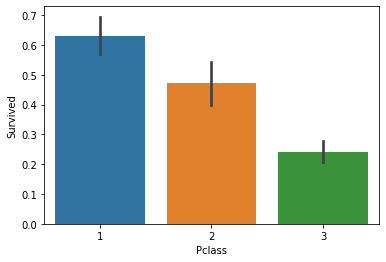

In [227]:
sns.barplot(x=df['Pclass'], y=df['Survived'])

Bilet fiyatı ve hayatta kalma ile da bağlantı vardır. Grafik incelenirse üst kısımlarda kalanlar turuncu yani hayatta kalanlar, bilet fiyatını fazladan alanlar olduğu görülecektir. Sadece az bilet ücreti verip de yaşayanlar çocuklardır. Bunun dışında veride yaşa göre hayatta kalma gözle görülür başka ilişki yoktur.

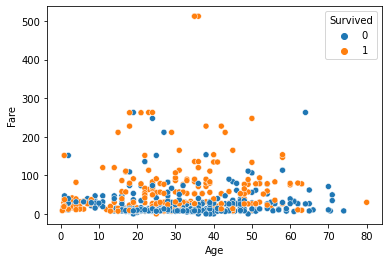

In [228]:
sns.scatterplot(hue="Survived", x="Age", y="Fare", data=df)

Kadın ve çocuklara öncelik verildiği aşağıdaki şekilde görülmektedir. Daha çok hayatta kalmışlardır.

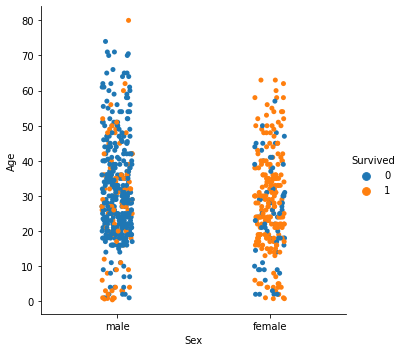

In [229]:
sns.catplot(x="Sex", y="Age", hue="Survived", data=df)

Bilet ücretini fazla ödemiş olan erkekler az olanlara göre daha çok hayatta kalmıştır. Kadınlarda da benzer konu hakimdir ancak kadın ve erkekler karşılatırıldığında kadınların daha çok hayatta kaldığı gözlemlenmiştir. Bu da kadınlara öncelik verildiğinin göstergesidir.

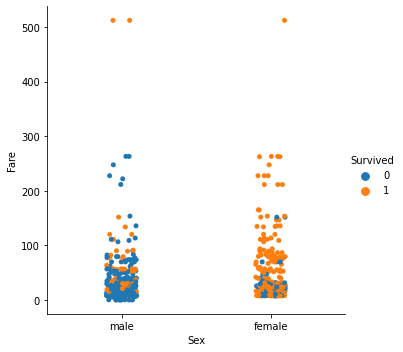

In [230]:
sns.catplot(x="Sex", y="Fare", hue="Survived", data=df)

Soru 8

In [231]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

df2= df.copy()
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
df2[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

my_imputer = SimpleImputer()
df_with_imputed_values = my_imputer.fit_transform(df2)
df_with_imputed_values_df = pd.DataFrame(df_with_imputed_values, columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])


missing_values_counts = df_with_imputed_values_df.isnull().sum()

missing_values_counts

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [232]:
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip --upgrade --user

In [233]:
#pip install fuzzywuzzy

Soru 9

In [234]:
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

df['Name'] = df['Name'].str.lower()

df['Name'] = df['Name'].str.strip()

names=df['Name'].unique()

names.sort()
names

array(['abbing, mr. anthony', 'abbott, mr. rossmore edward',
       'abbott, mrs. stanton (rosa hunt)', 'abelson, mr. samuel',
       'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'andersson, miss. ingeborg con

In [235]:
matches = fuzzywuzzy.process.extract("yousseff, mr. gerious",names, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('yousseff, mr. gerious', 100),
 ('youseff, mr. gerious', 97),
 ('moubarek, master. gerios', 63),
 ('ibrahim shawah, mr. yousseff', 62),
 ('betros, mr. tannous', 61),
 ('elias, mr. tannous', 57),
 ('samaan, mr. youssef', 56),
 ('nenkoff, mr. christo', 54),
 ('staneff, mr. ivan', 53),
 ('taussig, mr. emil', 53)]

In [236]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 96):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
  
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match
    print("Hepsi Tamam!")
    
replace_matches_in_column(df=df, column='Name', string_to_match="yousseff, mr. gerious")
names = df['Name'].unique()
names.sort()
names

Hepsi Tamam!


array(['abbing, mr. anthony', 'abbott, mr. rossmore edward',
       'abbott, mrs. stanton (rosa hunt)', 'abelson, mr. samuel',
       'abelson, mrs. samuel (hannah wizosky)',
       'adahl, mr. mauritz nils martin', 'adams, mr. john',
       'ahlin, mrs. johan (johanna persdotter larsson)',
       'aks, mrs. sam (leah rosen)', 'albimona, mr. nassef cassem',
       'alexander, mr. william', 'alhomaki, mr. ilmari rudolf',
       'ali, mr. ahmed', 'ali, mr. william',
       'allen, miss. elisabeth walton', 'allen, mr. william henry',
       'allison, master. hudson trevor', 'allison, miss. helen loraine',
       'allison, mrs. hudson j c (bessie waldo daniels)',
       'allum, mr. owen george',
       'andersen-jensen, miss. carla christine nielsine',
       'anderson, mr. harry', 'andersson, master. sigvard harald elias',
       'andersson, miss. ebba iris alfrida',
       'andersson, miss. ellis anna maria',
       'andersson, miss. erna alexandra',
       'andersson, miss. ingeborg con

Soru 10

In [237]:
df3 = df.copy()
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
df3[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df3.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Cabin          float64
Embarked       float64
dtype: object

Soru 11

Adulthood, yetişkinlik diye yeni değişken ürettim. Çünkü farkettim ki kadınlara ve çocuklara öncelik verilmiştir. Çocukları kadınlardan ve erkeklerden ayırabilmek daha doğru sonuçlara ulaşbilmek için yaptım. Buna göre şekillerde görüldüğü üzere çocuklar az bilet ücreti de verse, çocuklar arasındaki hayatta kalmada ki cinsiyet farkı yetişkinlerdeki kadar yoktur çocuklar erkek kız farketmeksizin kurtarılmıştır. Daha iyi sonuçlar için impute verilerle çalışılmıştır.
 

In [238]:
def age_classification(seri):
    if seri.Age < 18:
        return "Kid"
    elif seri.Age < 65:
        return "Young"
    else:
        return "Old"
df_with_imputed_values_df["Adulthood"] = df_with_imputed_values_df.apply(age_classification, axis=1)  


In [239]:
df_with_imputed_values_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adulthood
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0,Young
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0,Young
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0,Young
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0,Young
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0,Young


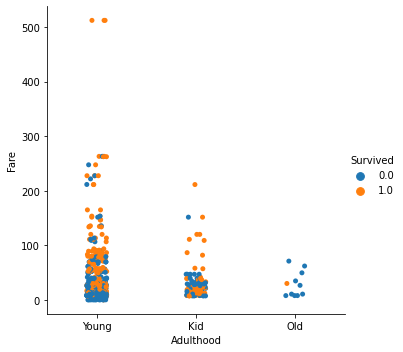

In [240]:
sns.catplot(x="Adulthood", y="Fare", hue="Survived", data=df_with_imputed_values_df)

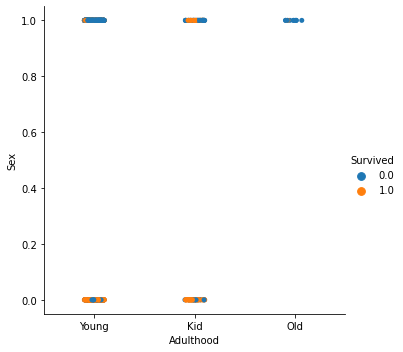

In [241]:
sns.catplot(x="Adulthood", y="Sex", hue="Survived", data=df_with_imputed_values_df)

Soru 12

In [242]:
X = df_with_imputed_values_df.copy()
y = X.pop("Survived")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [243]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state = 1)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

Fare           0.154754
Sex            0.138713
Ticket         0.124302
Cabin          0.048552
Pclass         0.032888
SibSp          0.028939
Adulthood      0.020765
PassengerId    0.019029
Age            0.013395
Parch          0.002815
Name           0.000000
Embarked       0.000000
Name: MI Scores, dtype: float64

Soru 13

Miktarlar arasında mümkün olan en az karşılıklı bilgi 0.0'dır. MI sıfır olduğunda, nicelikler bağımsızdır: ikisi de size diğeri hakkında hiçbir şey söyleyemez. Tersine, teoride MI'nın ne olabileceğine dair bir üst sınır yoktur. Sezgime göre daha iyi mutual information score vermesi gereken Pclass değişkenidir. Çünkü bilet sınıfı üst olan biri daha çok hayatta kalma ihtimali vardır. Burada üst sınıfa 1 düşük değeri verdiklerinden Fare değişkeniyle etkileşim kurup yeniden Price adı altında birleştirdim. Çıkan sonuca göre Price ile Pclass değişkenin MI değerinden daha yüksek bir MI değeri sonucuna ulaştım.

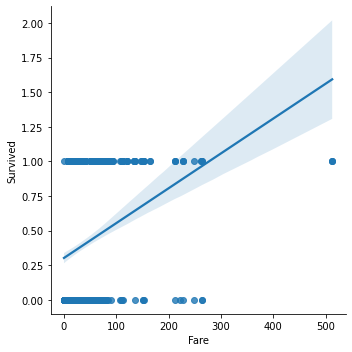

In [244]:
sns.lmplot(x="Fare", y="Survived", data = df_with_imputed_values_df)

In [245]:
df_with_imputed_values_df["Price"] = (
    df_with_imputed_values_df.Pclass + df_with_imputed_values_df.Fare
)
df_with_imputed_values_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adulthood,Price
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0,Young,10.2500
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0,Young,72.2833
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0,Young,10.9250
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0,Young,54.1000
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0,Young,11.0500


In [246]:
X = df_with_imputed_values_df.copy()
y = X.pop("Survived")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [247]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state = 1)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

Sex            0.168375
Fare           0.129427
Price          0.124279
Ticket         0.114013
Parch          0.049211
Pclass         0.047143
Age            0.040601
Cabin          0.033316
Embarked       0.022385
PassengerId    0.015717
SibSp          0.011517
Adulthood      0.003421
Name           0.001089
Name: MI Scores, dtype: float64

Soru 14

Pclass, Fare, Age kullanarak cluster adından yeni değişken ürettim. Böylelikle ekonomik durumları kümelenmiş oldu. Aşağıda çizdirilen plotta Bilet ücretleri kümelenmiştir.

In [248]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state = 1)

df_with_imputed_values_df["Cluster"] = kmeans.fit_predict(df_with_imputed_values_df.loc[:, ["Pclass", "Fare", "Age"]])
df_with_imputed_values_df["Cluster"] = df_with_imputed_values_df["Cluster"]

In [249]:
df_with_imputed_values_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adulthood,Price,Cluster
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0,Young,10.2500,0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0,Young,72.2833,3
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0,Young,10.9250,0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0,Young,54.1000,3
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0,Young,11.0500,0


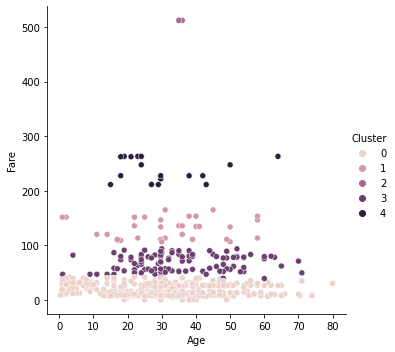

In [250]:
sns.relplot(
    x="Age", y="Fare", hue="Cluster", data=df_with_imputed_values_df, height=5,
);

Soru 15

Soru 16

In [251]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

df4 = df_with_imputed_values_df.copy()
s = (df_with_imputed_values_df.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
df4[object_cols] = ordinal_encoder.fit_transform(df_with_imputed_values_df[object_cols])

my_imputer = SimpleImputer()
df4_with_imputed_values = my_imputer.fit_transform(df4)
df4_with_imputed_values_df = pd.DataFrame(df4_with_imputed_values, columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Adulthood','Price','Cluster'])

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

feature_names = [features for features in df4.columns if df4[features].dtype in [np.int64]]
y =  (df4['Survived'])

X = df4.copy()
X.drop('Survived', axis=1, inplace=True)

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)

forest_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X, train_y)

Soru 17

In [253]:
#pip install eli5

In [254]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(forest_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1704 ± 0.0535,Sex
0.0251 ± 0.0193,Pclass
0.0108 ± 0.0166,Age
0.0009 ± 0.0132,Price
0.0009 ± 0.0036,Cabin
0.0000 ± 0.0080,SibSp
-0.0036 ± 0.0088,Cluster
-0.0063 ± 0.0122,Parch
-0.0090 ± 0.0057,Adulthood
-0.0099 ± 0.0154,Fare


Soru 18

Veri kümesinin tek bir satırı için SHAP değerlerine bakacağız (5. satırı keyfi olarak seçtik). Artan tahminlere neden olan özellik değerleri pembe renktedir ve görsel boyutları, özelliğin etkisinin büyüklüğünü gösterir. Tahmini azaltan özellik değerleri mavi renktedir. Pembe çubukların uzunluğundan mavi çubukların uzunluğunu çıkarırsanız, taban değerden(base value) çıktıya (output) olan mesafeye eşittir. Normalde 0.3725 base value ancak maviler yüzüne çıktı değerimiz 0.17'ye düşmüştür. Veri kümesinin tek bir satırı için SHAP değerlerine bakacağız (5. satırı keyfi olarak seçtik). 

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


y =  (df4['Survived'])
feature_names2 = [i for i in df4.columns if df4[i].dtype in [np.int64, np.int64]]
X = df4.copy()
X.drop('Survived', axis=1, inplace=True)
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [256]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

my_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.83, 0.17]])

In [257]:
#pip install shap

In [258]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [259]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [260]:
# use Kernel SHAP to explain test set predictions
# aynı sonucu verir
"""
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)
"""

'\nk_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)\nk_shap_values = k_explainer.shap_values(data_for_prediction)\nshap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_prediction)\n'

Soru 19

SibSp pembe artan etkidedir. O halde Sibsp ve Parch'ı toplayıp aile diye bir değişken üretirsek, bu durumda hayatta kalmayı etkileyebilir. Ailesiyle beraber olanlar yine belki pembe etkidedir.
Görüldüğü gibi Family daha çok mutual information skoru vermiştir.

In [261]:
df4["Family"] = (
    df4.SibSp + df4.Parch
)

In [262]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adulthood,Price,Cluster,Family
0,1.0,0.0,3.0,108.0,1.0,22.0,1.0,0.0,523.0,7.2500,76.0,2.0,2.0,10.2500,0,1.0
1,2.0,1.0,1.0,190.0,0.0,38.0,1.0,0.0,596.0,71.2833,81.0,0.0,2.0,72.2833,3,1.0
2,3.0,1.0,3.0,353.0,0.0,26.0,0.0,0.0,669.0,7.9250,76.0,2.0,2.0,10.9250,0,0.0
3,4.0,1.0,1.0,272.0,0.0,35.0,1.0,0.0,49.0,53.1000,55.0,2.0,2.0,54.1000,3,1.0
4,5.0,0.0,3.0,15.0,1.0,35.0,0.0,0.0,472.0,8.0500,76.0,2.0,2.0,11.0500,0,0.0


In [263]:
X = df4.copy()
y = X.pop("Survived")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [264]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state = 1)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

Sex            0.180997
Price          0.162242
Fare           0.110675
Ticket         0.106468
Pclass         0.074327
Cabin          0.068022
Cluster        0.061677
Family         0.027738
Embarked       0.022817
Age            0.022131
PassengerId    0.011697
Adulthood      0.010274
Name           0.002813
SibSp          0.002263
Parch          0.000000
Name: MI Scores, dtype: float64

Soru 20

İki ana sızıntı türü vardır: target leakage ve train-test contamination. 
Hedef sızıntısı(target leakage), tahmincileriniz, tahminde bulunduğunuz sırada mevcut olmayacak verileri içerdiğinde meydana gelir. Örnek olarak ders notlarında olan zatürre örneği olabilir. İnsanlar zatürre olduktan sonra iyileşmek için antibiyotik ilaçlar alırlar. Ham veriler bu sütunlar arasında güçlü bir ilişki olduğunu gösterir, ancak got_pneumonia değeri belirlendikten sonra take_antibiotic_medicine sıklıkla değiştirilir. Bu hedef sızıntısı.

Model, take_antibiotic_medicine için False değerine sahip olan birinin zatürre olmadığını görecektir. Doğrulama verileri eğitim verileriyle aynı kaynaktan geldiğinden, model doğrulamada kendini tekrar edecek ve model büyük doğrulama (veya çapraz doğrulama) puanlarına sahip olacaktır.

Ancak, gerçek dünyaya sonradan yerleştirildiğinde model çok yanlış olacaktır, çünkü zatürre olacak hastalar bile, gelecekteki sağlıkları hakkında tahminlerde bulunmamız gerektiğinde henüz antibiyotik almış olmayacaklardır.

Bu tür bir veri sızıntısını önlemek için, hedef değer gerçekleştikten sonra güncellenen (veya oluşturulan) herhangi bir değişken hariç tutulmalıdır.
Train-Test Contamination(Eğitim-Test Kirliliği):
Eğitim verilerini doğrulama verilerinden ayırmaya dikkat etmediğinizde farklı bir sızıntı türü oluşur.Doğrulamanın, modelin daha önce dikkate almadığı veriler üzerinde nasıl çalıştığının bir ölçüsü olması gerektiğini hatırlayın. Doğrulama verileri ön işleme davranışını etkiliyorsa, bu işlemi ince yöntemlerle bozabilirsiniz. Buna bazen eğitim test kontaminasyonu denir.

Örneğin, train_test_split() işlevini çağırmadan önce ön işlemeyi (eksik değerler için bir imputer takmak gibi) çalıştırdığınızı hayal edin.  Modeliniz iyi doğrulama puanları alarak size büyük bir güven verebilir, ancak karar vermek için onu dağıttığınızda düşük performans gösterebilir.

Ne de olsa, doğrulama veya test verilerinden gelen verileri tahminlerinizi nasıl yaptığınıza dahil ettiniz, böylece yeni verilere genelleme yapamasa bile bu belirli veriler üzerinde iyi sonuç verebilir. Daha karmaşık özellik mühendisliği yaptığınızda bu sorun daha da incelikli (ve daha tehlikeli) hale gelir.

Doğrulamanız basit bir tren-test bölünmesini temel alıyorsa, ön işleme adımlarının uyumu da dahil olmak üzere herhangi bir uydurma türünden doğrulama verilerini hariç tutun.  
Örnek olarak ders notlarında  kullanılan kredi kartı örneği olabilir. Örneğin harcama bu karttan mı yoksa başvuru öncesi kullanılan kartlardan mı yapılıyor? 
Eğitim ve doğrulama verilerinin dikkatli bir şekilde ayrılması, train test kontaminasyonunu önleyebilir ve boru hatları bu ayrımın uygulanmasına yardımcı olabilir. 


Soru 21

Pipeline'da bir ardışık düzen ile, her adımda eğitim ve doğrulama verilerinizi manuel olarak takip etmeniz gerekmez. Daha temiz kod yazmamızı sağlar. Daha az hata sağlar. Bir adımı yanlış uygulamak veya bir ön işleme adımını unutmak için daha az fırsat vardır. MAE değerimiz 0.24083798882681565 çıkmıştır, gayet iyidir.

In [265]:
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('/content/drive/MyDrive/train.csv')

# Separate target from predictors
y = data.Survived
X = data.drop(['Survived'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [266]:
X_train.head()

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
140,female,C,141,3,NaN,0,2,15.2458
439,male,S,440,2,31.0,0,0,10.5000
817,male,C,818,2,31.0,1,1,37.0042
378,male,C,379,3,20.0,0,0,4.0125
491,male,S,492,3,21.0,0,0,7.2500


In [267]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [268]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)

In [269]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.24083798882681565


Soru 22



In [270]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(min_samples_split=5, random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', decision_tree_model)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
score = mean_absolute_error( val_y, preds)
print('MAE:', score)

MAE: 0.28699551569506726


In [271]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.37988827 0.20786517 0.18539326 0.19101124 0.24719101]
Average MAE score (across experiments):
0.2422697884627456


Soru 23

In [272]:
model = RandomForestClassifier(n_estimators=500, random_state=0)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
score = mean_absolute_error( val_y, preds)
print('MAE:', score)

MAE: 0.21973094170403587


In [273]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.29608939 0.20786517 0.14606742 0.18539326 0.15730337]
Average MAE score (across experiments):
0.1985437197916013


Soru 24

In [274]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, random_state=0)

In [275]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])


# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
score = mean_absolute_error( val_y, preds)
print('MAE:', score)

MAE: 0.21076233183856502


In [276]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.38547486 0.20786517 0.15730337 0.21910112 0.18539326]
Average MAE score (across experiments):
0.23102755633670205


Soru 25


Bu kisimda modelleri birden fazla parametrelerle denedim ve en yuksek sonuc aldiklarimi son hallerine ekledim. Yukarida bu modeller parametreleriyle birlikte bulunmaktadir.

Soru 26

En uygun model Xgboost olarak belirlenmistir. Cunku cross validasyon skorlarinin MAE ortalamasi en düşüktür. Bu yuzden Xgboost secilmistir.



